# Principle Component Analysis Applied to the Stock Market
### https://github.com/gylx/Financial-Machine-Learning-Articles 
### https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e

### pip install yfinance
### pip install bs4
### pip install requests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()
tickers[0:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP']

In [4]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  503 of 503 completed


In [8]:
rs = prices.apply(np.log).diff(1)
prices.head


<bound method NDFrame.head of                      A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2020-01-02   84.799675  28.982893  155.478271   74.207466   80.137352   
2020-01-03   83.438148  27.548195  155.488022   73.486023   79.376686   
2020-01-06   83.684799  27.219410  152.932632   74.071579   80.003113   
2020-01-07   83.941315  27.119778  151.118530   73.723213   79.546715   
2020-01-08   84.770073  27.737495  149.382446   74.909149   80.110489   
...                ...        ...         ...         ...         ...   
2022-03-03  137.169998  15.710000  208.270004  166.229996  150.410004   
2022-03-04  133.889999  14.590000  206.619995  163.169998  150.559998   
2022-03-07  130.339996  12.840000  201.309998  159.300003  149.449997   
2022-03-08         NaN        NaN         NaN         NaN         NaN   
2022-03-09  131.389999  14.225000  204.014999  159.710007  147.910004   

                   A

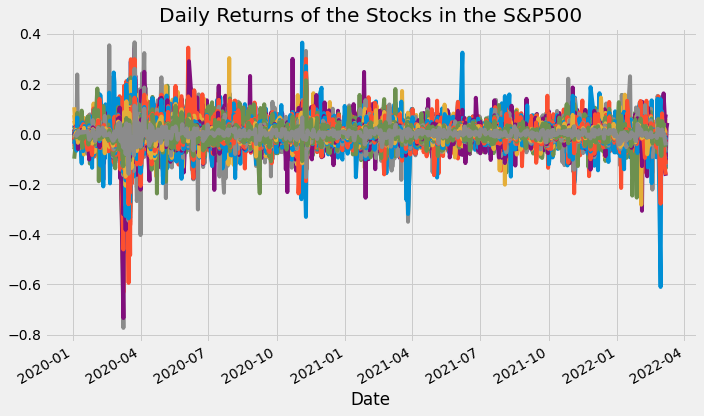

In [6]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

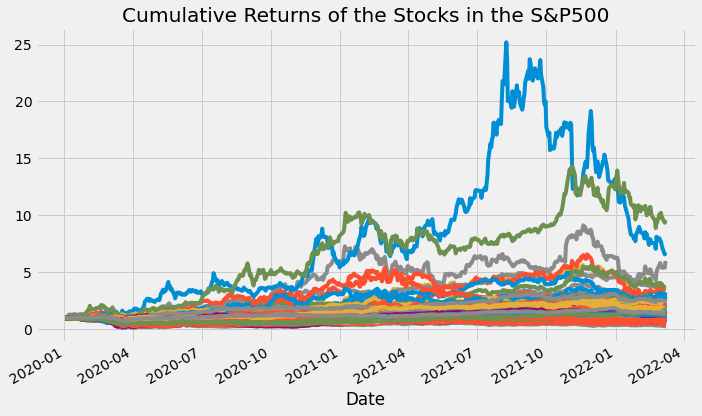

In [9]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(1).fit(rs.fillna(0))

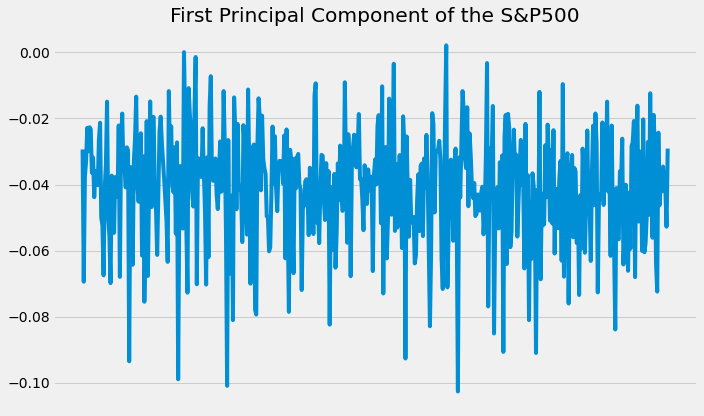

In [12]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0]) #Comoponentes de la serie de Furier para caracterizar la curva del SP500

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png') #Make a plot of market portfolio 

<AxesSubplot:xlabel='Date'>

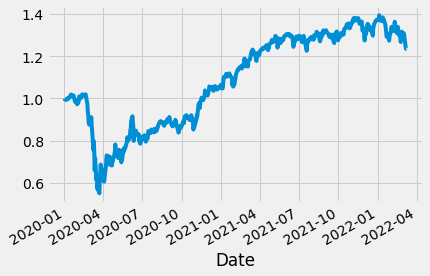

In [13]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [14]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


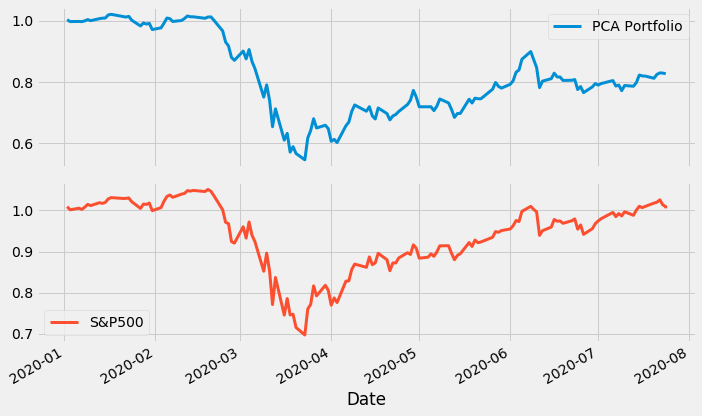

In [13]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

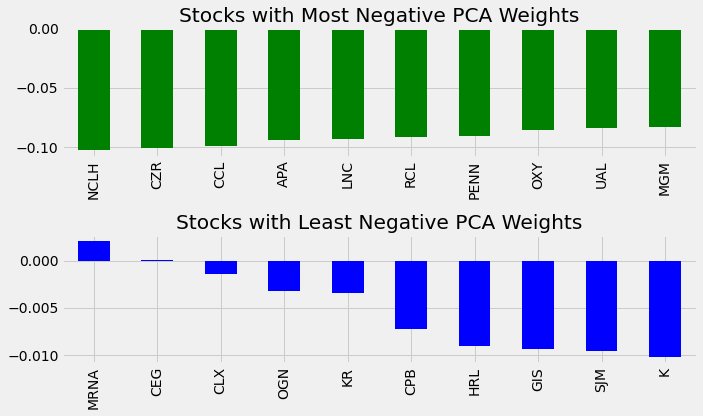

In [15]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

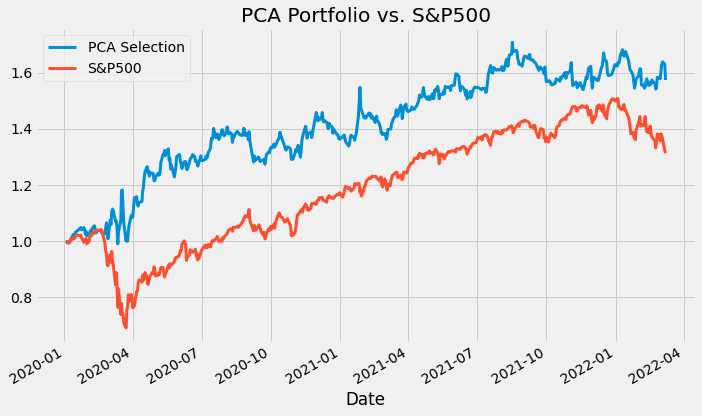

In [16]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')